<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_An%C3%A1lise_de_Dados_regressao_previs%C3%A3o_RH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Project about HR

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings



In [2]:
base_dados = pd.read_csv('Salary_Data.csv')

# checking
base_dados.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [52]:
base_dados.tail()

,Exp,Renda
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [3]:
# Renomenado as colunas
base_dados.rename( columns={
    'YearsExperience' : 'Exp',
    'Salary' : 'Renda'
}, inplace=True )

In [4]:
base_dados.shape

(30, 2)

In [5]:
base_dados.isnull().sum()

Exp      0
Renda    0
dtype: int64

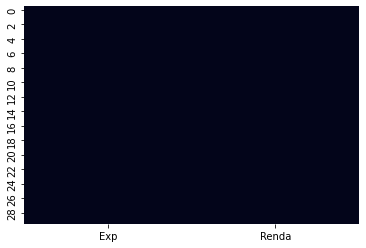

In [6]:

sns.heatmap( base_dados.isnull(), cbar=False );

In [7]:
base_dados.describe()

,Exp,Renda
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


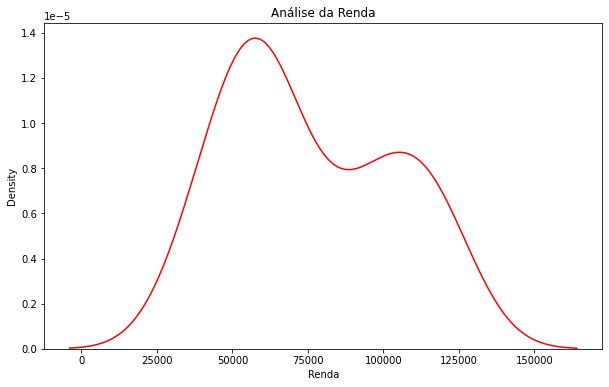

In [8]:
plt.figure( figsize=(10, 6) )
plt.title('Análise da Renda')
sns.kdeplot( base_dados['Renda'], color='red' );

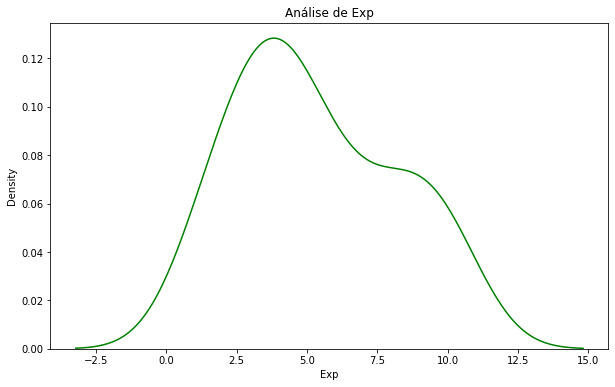

In [9]:
plt.figure( figsize=(10, 6) )
plt.title('Análise de Exp')
sns.kdeplot( base_dados['Exp'], color='green' );

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


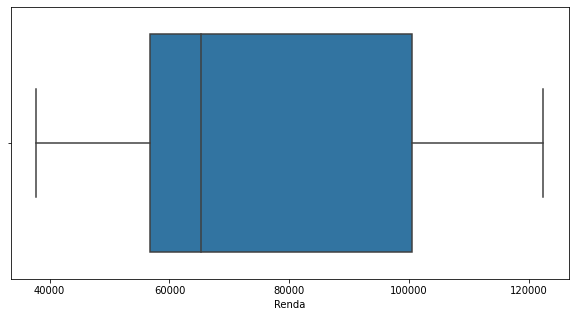

In [10]:
# Distribuição
plt.figure( figsize=(10, 5) )
sns.boxplot( base_dados['Renda'] );

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


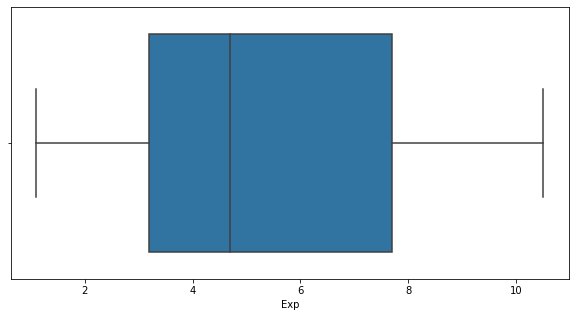

In [12]:
# Distribuição
plt.figure( figsize=(10, 5) )
sns.boxplot( base_dados['Exp'] );

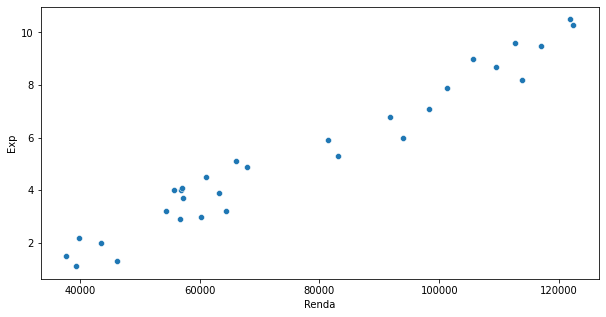

In [13]:
# Distribuiçã
plt.figure( figsize=(10, 5) )
sns.scatterplot( data=base_dados, x='Renda', y='Exp');

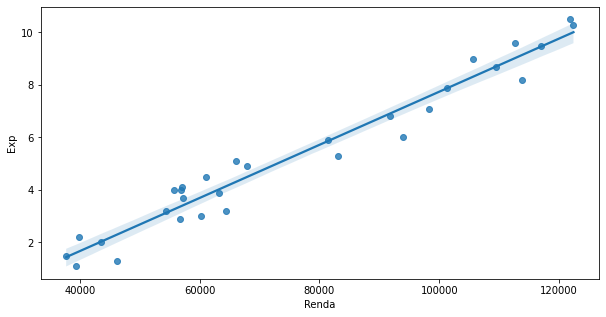

In [14]:
plt.figure( figsize=(10, 5) )
sns.regplot( data=base_dados, x='Renda', y='Exp');

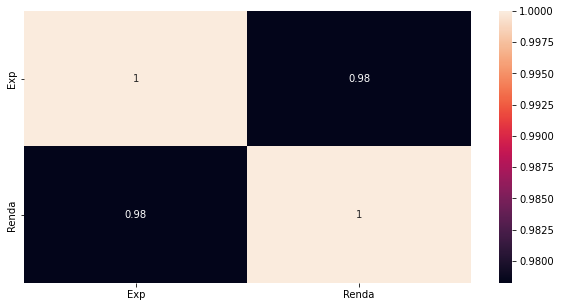

In [15]:
# Correlação
Correlacao = base_dados.corr('pearson')
plt.figure( figsize=(10, 5) )
sns.heatmap( Correlacao, annot=True, cbar=True );

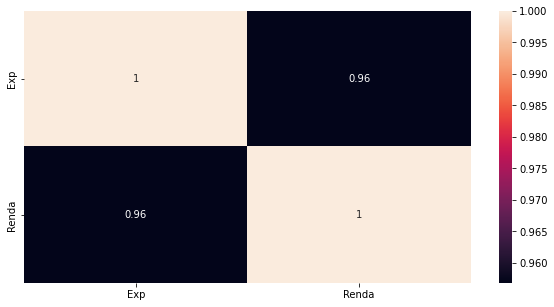

In [16]:
# Correlação
Correlacao = base_dados.corr('spearman')
plt.figure( figsize=(10, 5) )
sns.heatmap( Correlacao, annot=True, cbar=True );

In [18]:
x = base_dados.iloc[:,0].values
y = base_dados.iloc[:,1].values

In [19]:
x.shape

(30,)

In [23]:
x = x.reshape(-1,1)

In [25]:
x.shape , y.shape

((30, 1), (30,))

In [17]:
from sklearn.model_selection import train_test_split

In [26]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=0)

In [28]:
x_treino.shape

(22, 1)

In [29]:
y_treino.shape

(22,)

In [30]:
x_teste.shape

(8, 1)

In [31]:
y_teste.shape

(8,)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
regressao = LinearRegression()

In [34]:
regressao.fit(x_treino, y_treino)

LinearRegression()

In [37]:
forecast = regressao.predict(x_teste)
forecast #previsao

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [38]:
y_teste #base real

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.])

In [41]:
regressao.score(x_treino, y_treino)

0.9395413526983522

In [42]:
regressao.score(x_teste, y_teste)

0.9779208335417602

excelentes resultados, preveu muito bem

In [51]:
regressao.predict(np.array([[2.9]]))

array([54187.85174338])

In [45]:
Previsão = pd.DataFrame(forecast)

In [46]:
Previsão

,0
0,41056.257055
1,123597.709384
2,65443.504334
3,63567.562235
4,116093.940990
5,108590.172597
6,117031.912039
7,64505.533285


In [49]:
Previsões = Previsão.to_csv

pronto temos uma tabela com as previsoes, e podemos tbm fazer previsoes pra valores novos como fiz com Exp 2.9